In [36]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns

!pip install --upgrade mlxtend
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
import warnings
warnings.filterwarnings('ignore')


In [2]:
df = pd.read_csv(r'C:\Users\Admin\Desktop\data science assighnments\Clustering\Clustering\Online retail.csv')

In [3]:
df.head()

,"shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil"
0,"burgers,meatballs,eggs"
1,chutney
2,"turkey,avocado"
3,"mineral water,milk,energy bar,whole wheat rice..."
4,low fat yogurt


In [4]:
df.describe()

,"shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil"
count,7500
unique,5175
top,cookies
freq,223


In [5]:
df.isnull().sum()

shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil    0
dtype: int64

In [6]:
# Count items per transaction
df['Total_Items'] = df.sum(axis=1)
print("Items per transaction:\n", df['Total_Items'])

Items per transaction:
 0                                  burgers,meatballs,eggs
1                                                 chutney
2                                          turkey,avocado
3       mineral water,milk,energy bar,whole wheat rice...
4                                          low fat yogurt
                              ...                        
7495                        butter,light mayo,fresh bread
7496    burgers,frozen vegetables,eggs,french fries,ma...
7497                                              chicken
7498                                   escalope,green tea
7499      eggs,frozen smoothie,yogurt cake,low fat yogurt
Name: Total_Items, Length: 7500, dtype: object


In [7]:
# Drop duplicates
df = df.drop_duplicates()

In [8]:
df

,"shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil",Total_Items
0,"burgers,meatballs,eggs","burgers,meatballs,eggs"
1,chutney,chutney
2,"turkey,avocado","turkey,avocado"
3,"mineral water,milk,energy bar,whole wheat rice...","mineral water,milk,energy bar,whole wheat rice..."
4,low fat yogurt,low fat yogurt
...,...,...
7492,"burgers,salmon,pancakes,french fries,frozen sm...","burgers,salmon,pancakes,french fries,frozen sm..."
7493,"turkey,burgers,dessert wine,shrimp,pasta,tomat...","turkey,burgers,dessert wine,shrimp,pasta,tomat..."
7495,"butter,light mayo,fresh bread","butter,light mayo,fresh bread"
7496,"burgers,frozen vegetables,eggs,french fries,ma...","burgers,frozen vegetables,eggs,french fries,ma..."


In [9]:
# Reset index
df.reset_index(drop=True, inplace=True)


In [10]:
df


,"shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil",Total_Items
0,"burgers,meatballs,eggs","burgers,meatballs,eggs"
1,chutney,chutney
2,"turkey,avocado","turkey,avocado"
3,"mineral water,milk,energy bar,whole wheat rice...","mineral water,milk,energy bar,whole wheat rice..."
4,low fat yogurt,low fat yogurt
...,...,...
5170,"burgers,salmon,pancakes,french fries,frozen sm...","burgers,salmon,pancakes,french fries,frozen sm..."
5171,"turkey,burgers,dessert wine,shrimp,pasta,tomat...","turkey,burgers,dessert wine,shrimp,pasta,tomat..."
5172,"butter,light mayo,fresh bread","butter,light mayo,fresh bread"
5173,"burgers,frozen vegetables,eggs,french fries,ma...","burgers,frozen vegetables,eggs,french fries,ma..."


In [11]:
# Find unique items
unique_items = set(item for transaction in df['Total_Items'] for item in transaction.split(','))
print(f"Unique items: {unique_items}")

Unique items: {'barbecue sauce', 'blueberries', 'pet food', 'milk', 'oil', 'honey', 'bug spray', 'body spray', 'candy bars', 'butter', 'protein bar', 'herb & pepper', 'flax seed', 'muffins', 'pasta', 'sandwich', 'ground beef', 'fresh tuna', 'shallot', 'ham', 'hot dogs', 'light mayo', 'pickles', 'cake', 'green grapes', 'salt', 'shrimp', 'dessert wine', 'red wine', 'olive oil', 'napkins', 'cottage cheese', 'yams', 'mushroom cream sauce', 'ketchup', 'brownies', 'chutney', 'mashed potato', 'antioxydant juice', 'salad', 'clothes accessories', 'extra dark chocolate', 'nonfat milk', 'tea', 'whole weat flour', 'melons', 'salmon', 'gluten free bar', 'spinach', 'eggplant', 'green tea', 'almonds', 'energy drink', 'eggs', 'strawberries', 'sparkling water', 'soda', 'chocolate bread', 'cream', 'tomato juice', 'bramble', 'spaghetti', 'chili', 'chicken', 'cookies', 'escalope', 'avocado', 'strong cheese', 'tomatoes', 'mint green tea', 'champagne', 'rice', 'water spray', 'frozen smoothie', 'burgers', 'c

In [12]:
item_counts = Counter(item for transaction in df['Total_Items'] for item in transaction.split(','))
print("Item Frequency:")
print(item_counts)

Item Frequency:
Counter({'mineral water': 1551, 'spaghetti': 1188, 'eggs': 1077, 'chocolate': 1063, 'french fries': 997, 'milk': 880, 'green tea': 875, 'ground beef': 703, 'frozen vegetables': 672, 'pancakes': 648, 'burgers': 589, 'cake': 536, 'shrimp': 511, 'low fat yogurt': 491, 'tomatoes': 476, 'olive oil': 453, 'frozen smoothie': 438, 'chicken': 434, 'escalope': 434, 'turkey': 431, 'whole wheat rice': 403, 'cooking oil': 372, 'soup': 367, 'grated cheese': 363, 'herb & pepper': 344, 'honey': 337, 'cookies': 314, 'fresh bread': 307, 'salmon': 297, 'champagne': 284, 'avocado': 237, 'brownies': 233, 'cottage cheese': 222, 'hot dogs': 220, 'tomato juice': 218, 'butter': 213, 'whole wheat pasta': 210, 'red wine': 200, 'ham': 197, 'pepper': 193, 'cereals': 188, 'light mayo': 186, 'vegetables mix': 173, 'energy bar': 170, 'yogurt cake': 170, 'french wine': 168, 'oil': 162, 'energy drink': 161, 'fresh tuna': 160, 'almonds': 151, 'muffins': 149, 'meatballs': 147, 'parmesan cheese': 144, 'str

In [13]:
# Number of items per transaction
df['Num_Items'] = df['Total_Items'].apply(lambda x: len(x.split(',')))
print(df['Num_Items'].describe())

count    5175.000000
mean        5.071498
std         2.777176
min         1.000000
25%         3.000000
50%         4.000000
75%         7.000000
max        19.000000
Name: Num_Items, dtype: float64


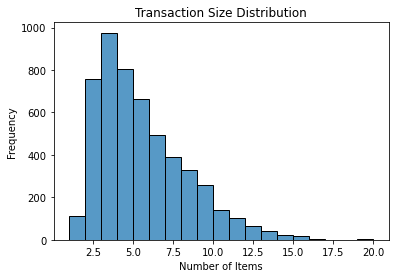

In [14]:
sns.histplot(df['Num_Items'], bins=range(1, df['Num_Items'].max() + 2), kde=False)
plt.title('Transaction Size Distribution')
plt.xlabel('Number of Items')
plt.ylabel('Frequency')
plt.show()

In [15]:
# Outliers in transaction size
q1 = df['Num_Items'].quantile(0.25)
q3 = df['Num_Items'].quantile(0.75)
iqr = q3 - q1


In [16]:

# Define lower and upper bounds for outliers
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

In [17]:
print(f"Lower Bound: {lower_bound}, Upper Bound: {upper_bound}")

Lower Bound: -3.0, Upper Bound: 13.0


In [18]:
# Keep transactions within bounds
data = df[(df['Num_Items'] >= lower_bound) & (df['Num_Items'] <= upper_bound)]

In [19]:
data.drop(columns=['Num_Items'], inplace=True)

print(f"Dataset after removing outliers:\n{data}")


Dataset after removing outliers:
     shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil  \
0                                burgers,meatballs,eggs                                                                                                                                                                                
1                                               chutney                                                                                                                                                                                
2                                        turkey,avocado                                                                                                                                                                                
3     mineral water,milk,energy bar,who

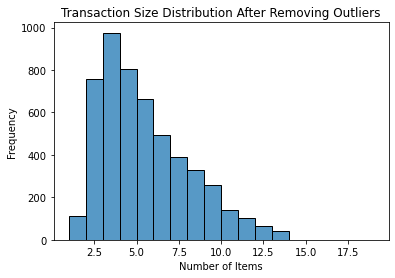

In [20]:
sns.histplot(data['Total_Items'].apply(lambda x: len(x.split(','))), bins=range(1, 20), kde=False)
plt.title('Transaction Size Distribution After Removing Outliers')
plt.xlabel('Number of Items')
plt.ylabel('Frequency')
plt.show()

In [21]:

# Step 1: Split the items in each transaction into a list
transactions = data['Total_Items'].apply(lambda x: x.split(',')).tolist()


In [22]:
# Step 2: Apply One-Hot Encoding
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)


In [23]:
# Convert the binary matrix into a DataFrame
df_encoded = pd.DataFrame(te_ary, columns=te.columns_)
df_encoded = df_encoded.astype(int)

In [24]:
# Display the one-hot encoded DataFrame
print("One-Hot Encoded DataFrame:\n", df_encoded)



One-Hot Encoded DataFrame:
        asparagus  almonds  antioxydant juice  asparagus  avocado  babies food  \
0              0        0                  0          0        0            0   
1              0        0                  0          0        0            0   
2              0        0                  0          0        1            0   
3              0        0                  0          0        0            0   
4              0        0                  0          0        0            0   
...          ...      ...                ...        ...      ...          ...   
5124           0        0                  0          0        0            0   
5125           0        0                  0          0        0            0   
5126           0        0                  0          0        0            0   
5127           0        0                  0          0        0            0   
5128           0        0                  0          0        0            0   


In [32]:
#  Apply the Apriori algorithm
frequent_itemsets = apriori(df_encoded, min_support=0.05 , use_colnames=True)


In [33]:
# Display the frequent itemsets
print("\nFrequent Itemsets:\n", frequent_itemsets)


Frequent Itemsets:
      support                      itemsets
0   0.112108                     (burgers)
1   0.101579                        (cake)
2   0.054592                   (champagne)
3   0.081692                     (chicken)
4   0.203938                   (chocolate)
5   0.060441                     (cookies)
6   0.070384                 (cooking oil)
7   0.207253                        (eggs)
8   0.082667                    (escalope)
9   0.189901                (french fries)
10  0.058491                 (fresh bread)
11  0.083057             (frozen smoothie)
12  0.127900           (frozen vegetables)
13  0.069994               (grated cheese)
14  0.167674                   (green tea)
15  0.133554                 (ground beef)
16  0.065315               (herb & pepper)
17  0.064145                       (honey)
18  0.094560              (low fat yogurt)
19  0.166894                        (milk)
20  0.296939               (mineral water)
21  0.085007                   (o

In [34]:
# Generate association rules from the frequent itemsets
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1,  num_itemsets=4)

In [35]:
# Display the association rules
print(rules)

        antecedents      consequents  antecedent support  consequent support  \
0       (chocolate)  (mineral water)            0.203938            0.296939   
1   (mineral water)      (chocolate)            0.296939            0.203938   
2       (spaghetti)      (chocolate)            0.225385            0.203938   
3       (chocolate)      (spaghetti)            0.203938            0.225385   
4            (eggs)  (mineral water)            0.207253            0.296939   
5   (mineral water)           (eggs)            0.296939            0.207253   
6     (ground beef)  (mineral water)            0.133554            0.296939   
7   (mineral water)    (ground beef)            0.296939            0.133554   
8       (spaghetti)    (ground beef)            0.225385            0.133554   
9     (ground beef)      (spaghetti)            0.133554            0.225385   
10  (mineral water)           (milk)            0.296939            0.166894   
11           (milk)  (mineral water)    

conclusion :- This rule indicates that chocolate and mineral water tend to appear togetherin a fairly significant number of transactionsbut are not strongly correlated.
There is a moderate association between chocolate and mineral water.When customers buy chocolate, they have a 35.46% chance of also buying mineral water.


Interview questions:- 
1.  Lift is a metric used in association rule mining to evaluate the strength of a rule beyond just the raw support or confidence values. It measures how much more likely the consequent is to appear when the antecedent is present, compared to when they are independent of each other. In simpler terms, it tells us whether the occurrence of one item influences the occurrence of another item.

2.  Support and Confidence are two key metrics used in Association Rule Mining to evaluate the strength of relationships between items in a dataset.Support measures how frequently a particular itemset (or combination of items) appears in the dataset. It tells us how common or rare a combination of items is in the transactions.

                              Support(A)= Total number of transactions/
                                          Number of transactions containing A
                                          
                            Support(A→B)= Total number of transactions/
                                          Number of transactions containing both A and B

  Confidence is a measure of the likelihood that the consequent (B) of a rule occurs when the antecedent (A) is present. 
                           
                              Confidence(A→B)= Support(A)/
                                               Support(A∩B)

3.  limitations or Challenges of association rule:- 

Scalability:- As the size of the dataset grows, the computational cost of finding frequent itemsets increases.

High Dimentionallity:- In large datasets with many items, the number of possible combinations of items increases exponentially. This leads to combinatorial explosion, making it hard to find meaningful rules in the vast space of itemsets.

Overfitting:- Overfitting occurs when the model finds patterns in the training data that do not generalize well to new, unseen data. This can happen when the thresholds for support and confidence are too low, leading to many spurious rules.

Multicollinearity:- Association rules can be highly redundant, where multiple rules convey the same or very similar information. For example, the rules "A → B" and "B → A" might both be generated, even though they represent the same relationship.